# Branch and Bound ——report

---
## 1. Setup


### 1.1 Packages





In [1]:
#import sys
#sys.path.append("/Users/zhaoziyue/opt/anaconda3/lib/python3.8/site-packages")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import time
import math
from copy import deepcopy

In [2]:
from prepareziyue import *
from BB import *
from gurobipy import *
from Node import *

### 1.2 Data
We read the data into python using pandas.

In [3]:
df = pd.read_csv('concrete.csv')
df=df.drop(df.columns[0], axis=1)
X_variable=df.iloc[:,:-1]
Y_variable=df.iloc[:,-1]

labels=np.array(Y_variable)
feature_list = list(X_variable.columns)
features = np.array(X_variable)

We use random forests regression.

In [4]:
flag=1 # Random forests regressor
rf=get_rf_gb_(features,labels,10,flag)
trees=get_input(rf,flag)

First, we may have a try of the `node` class.

In [24]:
# We may have a try of the node class.
S=Node(lb,ub,2,flag,trees)
b_convex = S.get_Convex_obj_val()
b_GBT = S.get_GBT_obj_val()
print(b_convex)
print(b_GBT)

0.0
107.05000000000001


We have the domain lb<=x<=ub. And then we could use the `weight_calculation` function to get the branch ordering

In [11]:
lb={}
ub={}
for i in total_split_variable(trees):
    lb[i]=-100
    ub[i]=100

In [12]:
# Get the branching ordering. 
# If you want more details about how to calculate the weights, please check the algorithm 3 in the article.
Branch_ordering=weight_calculation(trees)

We use the `B_B` function and check some information. Here we do not use the strong branching. And the information of the B&B algorithm is as follows:

In [13]:
S=Node(lb,ub,2,flag,trees)
b_lower_bounds,b_upper_bounds,begin_time=B_B(S, Branch_ordering,0)

Check begin time: Wed Aug 31 15:00:02 2022
convex part of S:  0.0
GBT part of S:  107.05000000000001
Check step 1-6 time:  Wed Aug 31 15:04:31 2022 best_lower_bound:  107.05000000000001 feasible solution:  152.89000000000001
Split node:  (7, 21.0)
Check the GBT lower bound after the partition refinement: 123.12
Check time of step 6-18: Wed Aug 31 15:05:14 2022 best_lower_bound:  123.12 feasible solution:  152.89000000000001
check time of step 19 Wed Aug 31 15:05:14 2022
child node has the convex part objective value and GBT part objective value  441.0 154.53000000000003 and the global value  595.53
the feasible solution  152.89000000000001
check time of step 19 Wed Aug 31 15:05:56 2022
child node has the convex part objective value and GBT part objective value  0.0 128.64 and the global value  128.64
the feasible solution  152.89000000000001
check step 20: we added a child node!  Wed Aug 31 15:06:37 2022
check step 23:  Wed Aug 31 15:06:37 2022 best_lower_bound:  123.12 feasible soluti

We could check the lower bounds and upper bounds.

In [15]:
b_lower_bounds

{1661929471.870479: {107.05000000000001},
 1661929514.7717628: {123.12},
 1661929748.395325: {123.12},
 1661929822.66204: {152.29},
 1661930170.1327639: {152.29},
 1661930344.7521322: {152.89000000000001}}

In [16]:
b_upper_bounds

{1661929471.8704782: {152.89000000000001},
 1661929514.7717628: {152.89000000000001},
 1661929748.395324: {152.89000000000001},
 1661929822.6620412: {152.89000000000001},
 1661930170.132763: {152.89000000000001},
 1661930344.7521331: {152.89000000000001}}

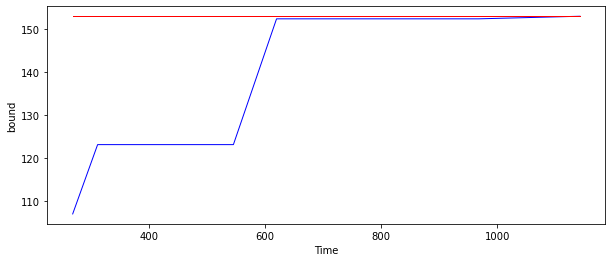

In [22]:
# plot figure
Time_1 =list(b_lower_bounds.keys())
Time_2 = list(b_upper_bounds.keys())
lower_bounds=[0]*len(Time_1)
upper_bounds=[0]*len(Time_2)
for i in range(len(Time_1)):
    lower_bounds[i] = list(b_lower_bounds[Time_1[i]])[0]
    upper_bounds[i] = list(b_upper_bounds[Time_2[i]])[0]
fig=plt.figure(figsize=(10,4))
plt.plot( [x -begin_time for x in Time_1],lower_bounds,lw=1,ls="-",c="b",label="ddd")
plt.plot([x -begin_time for x in Time_2],upper_bounds,lw=1,ls="-",c="r")
plt.xlabel("Time")
plt.ylabel("bound")
plt.show()

We now use the strong branching here. And the information of the B&B algorithm is as follows:

In [7]:
S=Node(lb,ub,2,flag,trees)
b_lower_bounds_2,b_upper_bounds_2,begin_time_2=B_B(S, Branch_ordering,1)

Check begin time: Wed Aug 31 14:34:38 2022
convex part of S:  0.0
GBT part of S:  107.05000000000001
Check step 1-6 time:  Wed Aug 31 14:39:17 2022 best_lower_bound:  107.05000000000001 feasible solution:  152.89000000000001
S node is  {0: -100, 1: -100, 2: -100, 3: -100, 4: -100, 5: -100, 6: -100, 7: -100} {0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100}
child 1 is  {0: -100, 1: -100, 2: -100, 3: -100, 4: -100, 5: -100, 6: -100, 7: -100} {0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 21.0}
child 2 is  {0: -100, 1: -100, 2: -100, 3: -100, 4: -100, 5: -100, 6: -100, 7: 21.0} {0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100}
We find the strong branching node.
Here the split node is 0 0
S node is  {0: -100, 1: -100, 2: -100, 3: -100, 4: -100, 5: -100, 6: -100, 7: -100} {0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 21.0}
The number of the node is  1
child 1 is  {0: -100, 1: -100, 2: -100, 3: -100, 4: -100, 5: -100, 6: -100, 7: -100}

We could check the lower bounds and upper bounds.

In [10]:
b_lower_bounds_2

{1661927957.4486542: {107.05000000000001},
 1661928000.453655: {128.64},
 1661928255.1467872: {128.64},
 1661928337.8238668: {152.29},
 1661928716.4217532: {152.29},
 1661928826.086143: {152.89000000000001}}

In [18]:
b_upper_bounds_2

{1661927957.448653: {152.89000000000001},
 1661928000.453656: {152.89000000000001},
 1661928255.1467829: {152.89000000000001},
 1661928337.823869: {152.89000000000001},
 1661928716.421752: {152.89000000000001},
 1661928826.086144: {152.89000000000001}}

We plot figure for B&B now. 

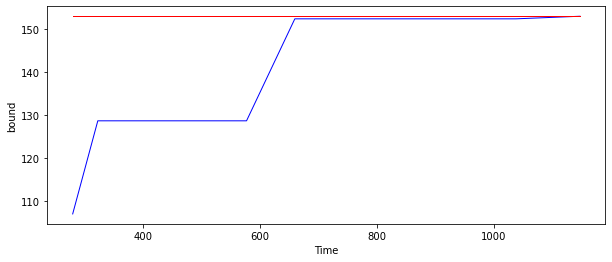

In [9]:
# plot figure
Time_1_2 =list(b_lower_bounds_2.keys())
Time_2_2 = list(b_upper_bounds_2.keys())
lower_bounds_2=[0]*len(Time_1_2)
upper_bounds_2=[0]*len(Time_2_2)
for i in range(len(Time_1_2)):
    lower_bounds_2[i] = list(b_lower_bounds_2[Time_1_2[i]])[0]
    upper_bounds_2[i] = list(b_upper_bounds_2[Time_2_2[i]])[0]
fig=plt.figure(figsize=(10,4))
plt.plot( [x -begin_time_2 for x in Time_1_2],lower_bounds_2,lw=1,ls="-",c="b")

plt.plot([x -begin_time_2 for x in Time_2_2],upper_bounds_2,lw=1,ls="-",c="r")
plt.xlabel("Time")
plt.ylabel("bound")
plt.show()